In [276]:
#TALLER 4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [277]:
df_col= pd.read_csv("ColombiaCB.csv")
df_col["Country"] = "Colombia"


In [278]:
df_all = pd.concat([df_col,df_chi,df_bra,df_arg, df_mex,df_uru, df_esp,df_sui, df_isr , df_usa] )
df_all = df_all.drop(["Organization Name URL"], axis=1)

In [279]:
df_all["Founded Date"] = pd.to_datetime(df_all["Founded Date"])
df_all["Exit Date"] = pd.to_datetime(df_all["Exit Date"])
df_all["Closed Date"] = pd.to_datetime(df_all["Closed Date"])
df_all["Last Funding Date"] = pd.to_datetime(df_all["Last Funding Date"])
df_all["Delisted Date"] = pd.to_datetime(df_all["Delisted Date"])
df_all["IPO Date"] = pd.to_datetime(df_all["IPO Date"])

In [280]:
df_startup = pd.read_excel("100startupcol.xlsx", index_col= 0)
df_startup =df_startup.rename(columns = {"1Doc3":"Startup"})
df_startup

,Startup,jcardona@1doc3.com
1,,
2,ADDI,ssuarez@addi.com
3,Aflore,manuel@aflore.co
4,Agrapp,david@agrapp.co
5,Aptuno,alejandro@aptuno.com
6,Arukay,vicky.ricaurte@gmail.com
...,...,...
107,Monolegal,NaN
108,Finsocial,santiago@finsocial.co
109,NaN,NaN


In [281]:
# intentemos con un merge

df_col_top_100 = pd.merge(df_col, df_startup, left_on="Organization Name", right_on= "Startup"  )
df_col_top_100 = df_col_top_100["Organization Name"].astype(str) 
df_col_top_100

0                La Haus
1                 Aflore
2                 Liftit
3                 Chiper
4                   Habi
5                  Valiu
6                  Rappi
7                 Zinobe
8     Mensajeros Urbanos
9              Finsocial
10                  Vozy
11                  Leal
12                Avista
13                Truora
14             Finaktiva
15                Sempli
16            Lentesplus
17                  Bold
18             Mi Aguila
19                 Foody
20            Farmalisto
21                 Minka
22              Simetrik
23             Foodology
24                 Peiky
25               Tributi
26                Aptuno
27                CIVICO
28               Frubana
29                Fitpal
30                  Loro
31              Valienta
32            Saludtools
33              Hometuls
34                Licify
35                Mowies
36                 Movii
37            Symplifica
38         LaManicurista
39               Talentu


In [282]:
print("Data Total Filas: %f"%(df_all.shape[1]))
print("Data TotalColumnas: %d"%(df_all.shape[0]))

print("100 Startup Filas: %d"%(df_startup.shape[1]))
print("100 Startup Columnas: %d"%(df_startup.shape[0]))

Data Total Filas: 103.000000
Data TotalColumnas: 9259
100 Startup Filas: 2
100 Startup Columnas: 110


In [283]:
startup_contained = []
startup_not_contained = []

df_colombia_company = df_all[ df_all['Country'] == 'Colombia' ]
list_colombia_company_names = df_colombia_company['Organization Name'].tolist()

for i in range(100):
    top_company_name = df_startup.iloc[i].Startup
    if top_company_name.upper() in (top_company_name.upper() for top_company_name in list_colombia_company_names):
        startup_contained.append(top_company_name)
    else:
        startup_not_contained.append(top_company_name)

print("[%d] estan contenidas, [%d] no estan contenidas"%(len(startup_contained),len(startup_not_contained)))


[56] estan contenidas, [44] no estan contenidas


In [284]:
# lo mismo que tuvimos con el merge 
startup_contained

['ADDI',
 'Aflore',
 'Agrapp',
 'Aptuno',
 'Arukay',
 'Avista',
 'Biocredit',
 'Bold',
 'Chiper',
 'DataWifi',
 'Direktio',
 'EnLaU',
 'Farmalisto',
 'Finaktiva',
 'Fitpal',
 'Fluvip',
 'Foodology',
 'Foody',
 'Frubana',
 'Habi',
 'Hometuls',
 'La Haus',
 'Laika',
 'LaManicurista',
 'Leal',
 'Lentesplus',
 'Licify',
 'Liftit',
 'Loro',
 'Mensajeros Urbanos',
 'Mesfix',
 'Mi Aguila',
 'Minka',
 'Mobijob',
 'Movii',
 'Mowies',
 'Muncher',
 'Muvo',
 'Peiky',
 'Pulzo',
 'Queo',
 'Rappi',
 'Saludtools',
 'Sempli',
 'Simetrik',
 'Symplifica',
 'Talentu',
 'Tiendapp',
 'TPaga',
 'Tributi',
 'Truora',
 'Ubits',
 'Valienta',
 'Valiu',
 'Vozy',
 'Zinobe']

# ADICIONO CAMPO A DR_ALL

In [285]:
df_colombia_company["isInTop100"] = 0

pass

<ipython-input-285-e063b199bc96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colombia_company["isInTop100"] = 0


In [286]:
for company_name in startup_contained:
    df_colombia_company.loc[df_colombia_company['Organization Name'] == company_name, ['isInTop100']] = 1

C:\Users\Julian\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [287]:
df_col_top100= df_colombia_company
df_col_top100[df_col_top100["isInTop100"]==1]

,Organization Name,Industries,Headquarters Location,Description,CB Rank (Company),Headquarters Regions,Estimated Revenue Range,Operating Status,Founded Date,Founded Date Precision,...,IPqwery - Patents Granted,IPqwery - Trademarks Registered,IPqwery - Most Popular Patent Class,IPqwery - Most Popular Trademark Class,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),School Method,Country,isInTop100
0,La Haus,"Information Technology, Marketplace, Real Esta...","Medellín, Antioquia, Colombia",La Haus is a residential marketplace used to h...,"1,457",Latin America,$1M to $10M,Active,2017-04-01,day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1
4,Aflore,"Credit, Finance, Financial Services, FinTech","Bogotá, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,"3,449",Latin America,$1M to $10M,Active,2012-01-01,year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1
7,Liftit,"Freight Service, Internet, Last Mile Transport...","Bogotá, Distrito Especial, Colombia",Liftit is the leading technology platform to a...,"5,562",Latin America,Less than $1M,Active,2017-01-07,day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1
8,Chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,"6,199",Latin America,$50M to $100M,Active,2018-01-01,year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1
9,Habi,"Home Renovation, Real Estate, Real Estate Inve...","Bogotá, Distrito Especial, Colombia",Habi is a digital platform that aims to simpli...,"7,387",Latin America,$1M to $10M,Active,2019-07-01,month,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1
10,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia",Valiu is a developing a digital remittance pla...,"7,499",Latin America,$1M to $10M,Active,2018-09-17,day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1
11,Rappi,"Consumer Goods, E-Commerce, Food Delivery","Bogotá, Distrito Especial, Colombia",Rappi is a consumer tech company that speciali...,"7,739",Latin America,$10M to $50M,Active,2015-01-01,year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1
13,Zinobe,"Big Data, Credit, Financial Services, FinTech,...","Bogotá, Distrito Especial, Colombia",Digital financial services company in the Colo...,"9,826",Latin America,$1M to $10M,Active,2011-07-01,day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1
15,Mensajeros Urbanos,NaN,"Bogotá, Distrito Especial, Colombia",The largest and diverse collaborative logistic...,"10,312",Latin America,$1M to $10M,Active,2013-01-01,year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1
19,Vozy,"Artificial Intelligence, Enterprise Software, ...","Medellín, Antioquia, Colombia",Vozy is a voice AI platform that helps compani...,"12,160",Latin America,Less than $1M,Active,2016-01-18,day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1


In [288]:
df_contactos = pd.read_excel("EUContactos.xlsx")
df_contactos

,Name,Industries,Description,Founded Date,Total Funding Amount,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,NIT,NOMBRE EMPRESA,CIIU,EMPRENDEDOR,DEPARTAMENTO,CIUDAD,CORREO ELECTRONICO,TELÉFONO,Unnamed: 16
0,La Haus,"Information Technology, Marketplace, Real Esta...",La Haus is a residential marketplace used to h...,2017-04-01,58200000.0,2021-01-14,35000000.0,USD,900809691.0,LA HAUS S.A.S.,6820 Actividades inmobiliarias realizadas a ca...,RODRIGO SANCHEZ RIOS,ANTIOQUIA,Medellín,jn@jaguarcapital.co; rs@jaguarcapital.co; rodr...,3017284; 3183284657,NaN
1,Liftit,"Freight Service, Internet, Last Mile Transport...",Liftit is the leading technology platform to a...,2017-01-07,39000000.0,2020-07-08,22500000.0,USD,901013959.0,LIFTIT S.A.S.,0004-Transporte y logística,Felipe Betancourt Celis,Bogotá D.C.,Bogotá,hola@liftit.co,3125218310,NaN
2,Frubana,"B2B, E-Commerce, E-Commerce Platforms, Logisti...",Frubana is a B2B platform of agri-products and...,2018-06-01,37000000.0,2020-01-07,25000000.0,USD,901109174.0,FRUBANA S A S,4631 Comercio al por mayor de productos alimen...,\tGOMEZ GUTIERREZ FABIAN ENRIQUE,Bogotá D.C.,Bogotá,fabian@frubana.com,3503189910 3225684066 3168302131,NaN
3,RobinFood,"Food and Beverage, Food Delivery, Restaurants,...",RobinFood is an operator of a chain of restaur...,2018-03-01,36000000.0,2020-10-02,16000000.0,USD,901131317.0,ROBINFOOD COLOMBIA S.A.S,5612 Expendio por autoservicio de comidas prep...,"José Guillermo Calderón, Mauricio Lopez",Bogotá D.C.,Bogotá,jose@muy.co; mlopez@muy.co,3209252642,NaN
4,Addi,"Finance, Financial Services, FinTech",Addi is a technology company that provides cre...,2018-01-01,31300000.0,2020-05-22,15000000.0,USD,901216768.0,ADELANTE SOLUCIONES FINANCIERAS S.A.S - ADDI,"6499 Otras actividades de servicio financiero,...",SANTIAGO SUAREZ VALLEJO\n\tDANIEL VALLEJO ARBE...,Bogotá D.C.,Bogotá,\tssuarez@adelantecredito.com,Fijo: 3462011; 3571170,NaN
5,Aflore,"Credit, Finance, Financial Services, FinTech",Aflore is a developer of tech-enabled direct s...,2012-01-01,29100000.0,2021-02-05,6500000.0,USD,900743636.0,AFLORE S.A.S.,8299 Otras actividades de servicio de apoyo a ...,ANA MARIA BARRERA VALLEJO,Bogotá D.C.,Bogotá,ana.barrera@polymathventures.co; accounting@af...,3003227; 3112710272,NaN
6,Chiper,"B2B, E-Commerce, Retail Technology",Chiper is a Colombian e-commerce platform for ...,2018-01-01,25000000.0,2020-10-16,12000000.0,USD,901145411.0,CHIPER S.A.S,4791 Comercio al por menor realizado a través ...,SARRIA GUERRERO OSCAR DAVID,Bogotá D.C.,Bogotá,contabilidad@chiper.co,3102326608,NaN
7,Merqueo,"Delivery, E-Commerce, Food and Beverage, Grocery",Merqueo is an online-based grocery delivery in...,2015-11-01,16000000.0,2019-02-10,14000000.0,USD,900871444.0,MERQUEO S A S,4631 Comercio al por mayor de productos alimen...,"Jose Guillermo Calderon, Miguel Mc Allister, M...",Bogotá D.C.,Bogotá,arestrepo@merqueo.com,5404058 3184021471,NaN
8,Habi,"Home Renovation, Real Estate, Real Estate Inve...",Habi is a digital platform that aims to simpli...,2019-07-01,15500000.0,2020-08-26,10000000.0,USD,901303824.0,INVERSIONES MCN S.A.S - HABI,6810 Actividades inmobiliarias realizadas con ...,"Brynne Rojas, Sebastian Noguera Escallón",Bogotá D.C.,Bogotá,info@habi.com; marisol@habi.co,3167584531; 3162323937,NaN
9,Lentesplus,"Customer Service, E-Commerce, Eyewear, Health ...",Lentesplus.com is the leading online contact l...,2014-01-01,13700000.0,2020-03-20,5200000.0,USD,900624765.0,LENTESPLUS.COM,4791-Comercio al por menor realizado a través ...,Diego Javier Mariño Gutierrez,Bogotá D.C.,Bogotá,diego@lentesplus.com,3187034757,NaN


In [289]:
# merge de las tres bases 

df_col_merge_1_bases = pd.merge(df_col_top100, df_contactos, left_on="Organization Name", right_on= "Name"  )
df_col_merge_2_bases

,Organization Name,Organization Name URL,Industries_x,Headquarters Location,Description_x,CB Rank (Company),Headquarters Regions,Estimated Revenue Range,Operating Status,Founded Date_x,...,Last Funding Amount Currency_y,NIT,NOMBRE EMPRESA,CIIU,EMPRENDEDOR,DEPARTAMENTO,CIUDAD,CORREO ELECTRONICO,TELÉFONO,Unnamed: 16
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","Medellín, Antioquia, Colombia",La Haus is a residential marketplace used to h...,"1,457",Latin America,$1M to $10M,Active,2017-04-01,...,USD,900809691.0,LA HAUS S.A.S.,6820 Actividades inmobiliarias realizadas a ca...,RODRIGO SANCHEZ RIOS,ANTIOQUIA,Medellín,jn@jaguarcapital.co; rs@jaguarcapital.co; rodr...,3017284; 3183284657,NaN
1,Dondo,https://www.crunchbase.com/organization/crowdswap,NaN,"Bogotá, Distrito Especial, Colombia",Get what you want giving what you have,"3,109",Latin America,NaN,Active,2019-04-01,...,USD,901186816.0,CROWDSWAP S.A.S,"7490 Otras actividades profesionales, científi...","Carlos Sánchez, Daniel Marulanda, Jesus Marque...",Bogotá D.C.,Bogotá,jm@crowdswap.com,3017148418,NaN
2,Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech","Bogotá, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,"3,449",Latin America,$1M to $10M,Active,2012-01-01,...,USD,900743636.0,AFLORE S.A.S.,8299 Otras actividades de servicio de apoyo a ...,ANA MARIA BARRERA VALLEJO,Bogotá D.C.,Bogotá,ana.barrera@polymathventures.co; accounting@af...,3003227; 3112710272,NaN
3,Backstartup,https://www.crunchbase.com/organization/backst...,"Accounting, Financial Services, Small and Medi...","Bogotá, Distrito Especial, Colombia",SwaS (Software with a services) that automates...,"3,607",Latin America,Less than $1M,Active,2014-09-08,...,USD,900771183.0,BACKSTARTUP,7020-Actividades de consultaría de gestión,Cristian Camilo Villamizar Gelvez,Bogotá D.C.,Bogotá,camila.olivar@backstartup.com,3164715235,NaN
4,Liftit,https://www.crunchbase.com/organization/liftit-co,"Freight Service, Internet, Last Mile Transport...","Bogotá, Distrito Especial, Colombia",Liftit is the leading technology platform to a...,"5,562",Latin America,Less than $1M,Active,2017-01-07,...,USD,901013959.0,LIFTIT S.A.S.,0004-Transporte y logística,Felipe Betancourt Celis,Bogotá D.C.,Bogotá,hola@liftit.co,3125218310,NaN
5,Chiper,https://www.crunchbase.com/organization/chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,"6,199",Latin America,$50M to $100M,Active,2018-01-01,...,USD,901145411.0,CHIPER S.A.S,4791 Comercio al por menor realizado a través ...,SARRIA GUERRERO OSCAR DAVID,Bogotá D.C.,Bogotá,contabilidad@chiper.co,3102326608,NaN
6,Habi,https://www.crunchbase.com/organization/habi-fefd,"Home Renovation, Real Estate, Real Estate Inve...","Bogotá, Distrito Especial, Colombia",Habi is a digital platform that aims to simpli...,"7,387",Latin America,$1M to $10M,Active,2019-07-01,...,USD,901303824.0,INVERSIONES MCN S.A.S - HABI,6810 Actividades inmobiliarias realizadas con ...,"Brynne Rojas, Sebastian Noguera Escallón",Bogotá D.C.,Bogotá,info@habi.com; marisol@habi.co,3167584531; 3162323937,NaN
7,RobinFood,https://www.crunchbase.com/organization/muy,"Food and Beverage, Food Delivery, Restaurants,...","Bogotá, Distrito Especial, Colombia",RobinFood is an operator of a chain of restaur...,"8,657",Latin America,Less than $1M,Active,2018-03-01,...,USD,901131317.0,ROBINFOOD COLOMBIA S.A.S,5612 Expendio por autoservicio de comidas prep...,"José Guillermo Calderón, Mauricio Lopez",Bogotá D.C.,Bogotá,jose@muy.co; mlopez@muy.co,3209252642,NaN
8,LAIKA,https://www.crunchbase.com/organization/laika,"Consumer Goods, E-Commerce, Pet, Retail","Bogotá, Distrito Especial, Colombia",LAIKA is an e-commerce platform for pets that ...,"11,647",Latin America,NaN,Active,2017-08-30,...,USD,901110407.0,PROYECTO E SAS - LAIKA,4791 

In [290]:
df_col_merge_2_bases = pd.merge(df_col, df_contactos, left_on="Organization Name", right_on= "Name"  )
df_col_merge_2_bases

,Organization Name,Organization Name URL,Industries_x,Headquarters Location,Description_x,CB Rank (Company),Headquarters Regions,Estimated Revenue Range,Operating Status,Founded Date_x,...,Last Funding Amount Currency_y,NIT,NOMBRE EMPRESA,CIIU,EMPRENDEDOR,DEPARTAMENTO,CIUDAD,CORREO ELECTRONICO,TELÉFONO,Unnamed: 16
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","Medellín, Antioquia, Colombia",La Haus is a residential marketplace used to h...,"1,457",Latin America,$1M to $10M,Active,2017-04-01,...,USD,900809691.0,LA HAUS S.A.S.,6820 Actividades inmobiliarias realizadas a ca...,RODRIGO SANCHEZ RIOS,ANTIOQUIA,Medellín,jn@jaguarcapital.co; rs@jaguarcapital.co; rodr...,3017284; 3183284657,NaN
1,Dondo,https://www.crunchbase.com/organization/crowdswap,NaN,"Bogotá, Distrito Especial, Colombia",Get what you want giving what you have,"3,109",Latin America,NaN,Active,2019-04-01,...,USD,901186816.0,CROWDSWAP S.A.S,"7490 Otras actividades profesionales, científi...","Carlos Sánchez, Daniel Marulanda, Jesus Marque...",Bogotá D.C.,Bogotá,jm@crowdswap.com,3017148418,NaN
2,Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech","Bogotá, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,"3,449",Latin America,$1M to $10M,Active,2012-01-01,...,USD,900743636.0,AFLORE S.A.S.,8299 Otras actividades de servicio de apoyo a ...,ANA MARIA BARRERA VALLEJO,Bogotá D.C.,Bogotá,ana.barrera@polymathventures.co; accounting@af...,3003227; 3112710272,NaN
3,Backstartup,https://www.crunchbase.com/organization/backst...,"Accounting, Financial Services, Small and Medi...","Bogotá, Distrito Especial, Colombia",SwaS (Software with a services) that automates...,"3,607",Latin America,Less than $1M,Active,2014-09-08,...,USD,900771183.0,BACKSTARTUP,7020-Actividades de consultaría de gestión,Cristian Camilo Villamizar Gelvez,Bogotá D.C.,Bogotá,camila.olivar@backstartup.com,3164715235,NaN
4,Liftit,https://www.crunchbase.com/organization/liftit-co,"Freight Service, Internet, Last Mile Transport...","Bogotá, Distrito Especial, Colombia",Liftit is the leading technology platform to a...,"5,562",Latin America,Less than $1M,Active,2017-01-07,...,USD,901013959.0,LIFTIT S.A.S.,0004-Transporte y logística,Felipe Betancourt Celis,Bogotá D.C.,Bogotá,hola@liftit.co,3125218310,NaN
5,Chiper,https://www.crunchbase.com/organization/chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,"6,199",Latin America,$50M to $100M,Active,2018-01-01,...,USD,901145411.0,CHIPER S.A.S,4791 Comercio al por menor realizado a través ...,SARRIA GUERRERO OSCAR DAVID,Bogotá D.C.,Bogotá,contabilidad@chiper.co,3102326608,NaN
6,Habi,https://www.crunchbase.com/organization/habi-fefd,"Home Renovation, Real Estate, Real Estate Inve...","Bogotá, Distrito Especial, Colombia",Habi is a digital platform that aims to simpli...,"7,387",Latin America,$1M to $10M,Active,2019-07-01,...,USD,901303824.0,INVERSIONES MCN S.A.S - HABI,6810 Actividades inmobiliarias realizadas con ...,"Brynne Rojas, Sebastian Noguera Escallón",Bogotá D.C.,Bogotá,info@habi.com; marisol@habi.co,3167584531; 3162323937,NaN
7,RobinFood,https://www.crunchbase.com/organization/muy,"Food and Beverage, Food Delivery, Restaurants,...","Bogotá, Distrito Especial, Colombia",RobinFood is an operator of a chain of restaur...,"8,657",Latin America,Less than $1M,Active,2018-03-01,...,USD,901131317.0,ROBINFOOD COLOMBIA S.A.S,5612 Expendio por autoservicio de comidas prep...,"José Guillermo Calderón, Mauricio Lopez",Bogotá D.C.,Bogotá,jose@muy.co; mlopez@muy.co,3209252642,NaN
8,LAIKA,https://www.crunchbase.com/organization/laika,"Consumer Goods, E-Commerce, Pet, Retail","Bogotá, Distrito Especial, Colombia",LAIKA is an e-commerce platform for pets that ...,"11,647",Latin America,NaN,Active,2017-08-30,...,USD,901110407.0,PROYECTO E SAS - LAIKA,4791 

In [291]:
df_col_merge_0_bases = pd.merge(df_col, df_startup, left_on="Organization Name", right_on= "Startup"  )
df_col_merge_0_bases

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Headquarters Regions,Estimated Revenue Range,Operating Status,Founded Date,...,IPqwery - Trademarks Registered,IPqwery - Most Popular Patent Class,IPqwery - Most Popular Trademark Class,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),School Method,Country,Startup,jcardona@1doc3.com
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","Medellín, Antioquia, Colombia",La Haus is a residential marketplace used to h...,"1,457",Latin America,$1M to $10M,Active,2017-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,La Haus,diego@lentesplus.com
1,Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech","Bogotá, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,"3,449",Latin America,$1M to $10M,Active,2012-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Aflore,manuel@aflore.co
2,Liftit,https://www.crunchbase.com/organization/liftit-co,"Freight Service, Internet, Last Mile Transport...","Bogotá, Distrito Especial, Colombia",Liftit is the leading technology platform to a...,"5,562",Latin America,Less than $1M,Active,2017-01-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Liftit,brian@liftit.co
3,Chiper,https://www.crunchbase.com/organization/chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,"6,199",Latin America,$50M to $100M,Active,2018-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Chiper,jose@chiper.co
4,Habi,https://www.crunchbase.com/organization/habi-fefd,"Home Renovation, Real Estate, Real Estate Inve...","Bogotá, Distrito Especial, Colombia",Habi is a digital platform that aims to simpli...,"7,387",Latin America,$1M to $10M,Active,2019-07-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Habi,sebastian@habi.co
5,Valiu,https://www.crunchbase.com/organization/valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia",Valiu is a developing a digital remittance pla...,"7,499",Latin America,$1M to $10M,Active,2018-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Valiu,NaN
6,Rappi,https://www.crunchbase.com/organization/rappi,"Consumer Goods, E-Commerce, Food Delivery","Bogotá, Distrito Especial, Colombia",Rappi is a consumer tech company that speciali...,"7,739",Latin America,$10M to $50M,Active,2015-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Rappi,simon@rappi.com
7,Zinobe,https://www.crunchbase.com/organization/zinobe,"Big Data, Credit, Financial Services, FinTech,...","Bogotá, Distrito Especial, Colombia",Digital financial services company in the Colo...,"9,826",Latin America,$1M to $10M,Active,2011-07-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Zinobe,tarek@zinobe.com
8,Mensajeros Urbanos,https://www.crunchbase.com/organization/mensaj...,NaN,"Bogotá, Distrito Especial, Colombia",The largest and diverse collaborative logistic...,"10,312",Latin America,$1M to $10M,Active,2013-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Mensajeros Urbanos,santiago@mensajerosurbanos.com
9,Finsocial,https://www.crunchbase.com/organization/finsocial,"Banking, Financial Services","Barranquilla, Atlantico, Colombia",Finsocial provides credit solutions including ...,"12,053",Latin America,NaN,Active,2012-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Finsocial,santiago@finsocial.co


In [292]:
df_col_merge_3_bases = pd.merge(df_col_merge_2_bases, df_col_merge_0_bases, left_on="Organization Name", right_on= "Organization Name"  )
df_col_merge_3_bases

,Organization Name,Organization Name URL_x,Industries_x,Headquarters Location_x,Description_x,CB Rank (Company)_x,Headquarters Regions_x,Estimated Revenue Range_x,Operating Status_x,Founded Date_x,...,IPqwery - Trademarks Registered_y,IPqwery - Most Popular Patent Class_y,IPqwery - Most Popular Trademark Class_y,Aberdeen - IT Spend_y,Aberdeen - IT Spend Currency_y,Aberdeen - IT Spend Currency (in USD)_y,School Method_y,Country_y,Startup,jcardona@1doc3.com
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","Medellín, Antioquia, Colombia",La Haus is a residential marketplace used to h...,"1,457",Latin America,$1M to $10M,Active,2017-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,La Haus,diego@lentesplus.com
1,Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech","Bogotá, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,"3,449",Latin America,$1M to $10M,Active,2012-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Aflore,manuel@aflore.co
2,Liftit,https://www.crunchbase.com/organization/liftit-co,"Freight Service, Internet, Last Mile Transport...","Bogotá, Distrito Especial, Colombia",Liftit is the leading technology platform to a...,"5,562",Latin America,Less than $1M,Active,2017-01-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Liftit,brian@liftit.co
3,Chiper,https://www.crunchbase.com/organization/chiper,"B2B, E-Commerce, Retail Technology","Cundinamarca, Distrito Especial, Colombia",Chiper is a Colombian e-commerce platform for ...,"6,199",Latin America,$50M to $100M,Active,2018-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Chiper,jose@chiper.co
4,Habi,https://www.crunchbase.com/organization/habi-fefd,"Home Renovation, Real Estate, Real Estate Inve...","Bogotá, Distrito Especial, Colombia",Habi is a digital platform that aims to simpli...,"7,387",Latin America,$1M to $10M,Active,2019-07-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Habi,sebastian@habi.co
5,Vozy,https://www.crunchbase.com/organization/vozy-inc,"Artificial Intelligence, Enterprise Software, ...","Medellín, Antioquia, Colombia",Vozy is a voice AI platform that helps compani...,"12,160",Latin America,Less than $1M,Active,2016-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Vozy,hpertuz@vozy.co
6,Truora,https://www.crunchbase.com/organization/truora,"Developer Platform, Information Services, Secu...","Cali, Valle del Cauca, Colombia","Truora provides fast, innovative, and safe sol...","14,245",Latin America,$1M to $10M,Active,2018-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Truora,dbilbao@truora.com
7,Lentesplus,https://www.crunchbase.com/organization/lentes...,"Customer Service, E-Commerce, Eyewear, Health ...","Bogotá, Distrito Especial, Colombia",Lentesplus.com is the leading online contact l...,"17,846",Latin America,$1M to $10M,Active,2014-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Lentesplus,diego@lentesplus.com
8,Frubana,https://www.crunchbase.com/organization/frubana,"AgTech, B2B, E-Commerce, Logistics, Restaurants","Bogotá, Distrito Especial, Colombia",Frubana is a B2B platform of agri-products and...,"32,289",Latin America,$1M to $10M,Active,2018-06-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Frubana,fabian@frubana.co


In [293]:
def Cotejar(data, values):
    if data in values:
        return 1
    else:
        return 0


In [294]:
df_col['cotejar_Or'] = df_col['Organization Name'].apply(Cotejar, values=df_contactos['Name'].tolist())
df_col

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Headquarters Regions,Estimated Revenue Range,Operating Status,Founded Date,...,IPqwery - Patents Granted,IPqwery - Trademarks Registered,IPqwery - Most Popular Patent Class,IPqwery - Most Popular Trademark Class,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),School Method,Country,cotejar_Or
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","Medellín, Antioquia, Colombia",La Haus is a residential marketplace used to h...,"1,457",Latin America,$1M to $10M,Active,2017-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1
1,Elenas,https://www.crunchbase.com/organization/elenas,"Beauty, Cosmetics, Direct Sales, E-Commerce","Bogotá, Distrito Especial, Colombia",Elenas is a Latin American social commerce pla...,"2,462",Latin America,NaN,Active,2018-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,0
2,Dondo,https://www.crunchbase.com/organization/crowdswap,NaN,"Bogotá, Distrito Especial, Colombia",Get what you want giving what you have,"3,109",Latin America,NaN,Active,2019-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1
3,Tpaga,https://www.crunchbase.com/organization/tpaga,"Financial Services, FinTech, Mobile, Mobile Pa...","Bogotá, Distrito Especial, Colombia",Tpaga enables consumers to receive and spend m...,"3,183",Latin America,Less than $1M,Active,2015-08-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,0
4,Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech","Bogotá, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,"3,449",Latin America,$1M to $10M,Active,2012-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Flores Y Mas,https://www.crunchbase.com/organization/flores...,"E-Commerce, Flowers, Retail","Medellín, Antioquia, Colombia",Premier Columbian floral arrangements and deli...,"743,301",Latin America,Less than $1M,Active,2014-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,0
996,Focus Data,https://www.crunchbase.com/organization/focus-...,"Advertising, Analytics, Artificial Intelligenc...","Pereira, Risaralda, Colombia",Marketing Analytics,"746,877",Latin America,NaN,Active,2019-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,0
997,Oficina Virtual,https://www.crunchbase.com/organization/oficin...,NaN,"Bogotá, Distrito Especial, Colombia",Oficina Virtual provides a modern and professi...,"747,778",Latin America,Less than $1M,Active,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,0
998,Uzer,https://www.crunchbase.com/organization/uzer-dde8,"Digital Marketing, Web Design","Bogotá, Distrito Especial, Colombia",Uzer develops innovative digital marketing str...,"747,877",Latin America,NaN,Active,2015-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,0


In [295]:
df_col['cotejar_1'] = df_col_top100["isInTop100"]
df_col['cotejar_all3'] = df_col['cotejar_1'].apply(Cotejar, values=df_col['cotejar_Or'].tolist())

df_col

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Headquarters Regions,Estimated Revenue Range,Operating Status,Founded Date,...,IPqwery - Most Popular Patent Class,IPqwery - Most Popular Trademark Class,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),School Method,Country,cotejar_Or,cotejar_1,cotejar_all3
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","Medellín, Antioquia, Colombia",La Haus is a residential marketplace used to h...,"1,457",Latin America,$1M to $10M,Active,2017-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1,1,1
1,Elenas,https://www.crunchbase.com/organization/elenas,"Beauty, Cosmetics, Direct Sales, E-Commerce","Bogotá, Distrito Especial, Colombia",Elenas is a Latin American social commerce pla...,"2,462",Latin America,NaN,Active,2018-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,0,0,1
2,Dondo,https://www.crunchbase.com/organization/crowdswap,NaN,"Bogotá, Distrito Especial, Colombia",Get what you want giving what you have,"3,109",Latin America,NaN,Active,2019-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1,0,1
3,Tpaga,https://www.crunchbase.com/organization/tpaga,"Financial Services, FinTech, Mobile, Mobile Pa...","Bogotá, Distrito Especial, Colombia",Tpaga enables consumers to receive and spend m...,"3,183",Latin America,Less than $1M,Active,2015-08-10,...,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,0,0,1
4,Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech","Bogotá, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,"3,449",Latin America,$1M to $10M,Active,2012-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Flores Y Mas,https://www.crunchbase.com/organization/flores...,"E-Commerce, Flowers, Retail","Medellín, Antioquia, Colombia",Premier Columbian floral arrangements and deli...,"743,301",Latin America,Less than $1M,Active,2014-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,0,0,1
996,Focus Data,https://www.crunchbase.com/organization/focus-...,"Advertising, Analytics, Artificial Intelligenc...","Pereira, Risaralda, Colombia",Marketing Analytics,"746,877",Latin America,NaN,Active,2019-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,0,0,1
997,Oficina Virtual,https://www.crunchbase.com/organization/oficin...,NaN,"Bogotá, Distrito Especial, Colombia",Oficina Virtual provides a modern and professi...,"747,778",Latin America,Less than $1M,Active,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,0,0,1
998,Uzer,https://www.crunchbase.com/organization/uzer-dde8,"Digital Marketing, Web Design","Bogotá, Distrito Especial, Colombia",Uzer develops innovative digital marketing str...,"747,877",Latin America,NaN,Active,2015-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,0,0,1


In [296]:
# var clasificatorias , var objetivo interseccion 3 datas la ultima subir git antes de la 1

import seaborn as sns

df3=df_col["Headquarters Location"].str.split(",", n = 2, expand = True) 

####  adicionando las nuevas columnas a df original
df_col["City"]= df3[0] 
df_col["Region"]= df3[1] 
df_col.head(3)



,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Headquarters Regions,Estimated Revenue Range,Operating Status,Founded Date,...,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),School Method,Country,cotejar_Or,cotejar_1,cotejar_all3,City,Region
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","Medellín, Antioquia, Colombia",La Haus is a residential marketplace used to h...,"1,457",Latin America,$1M to $10M,Active,2017-04-01,...,NaN,NaN,NaN,NaN,Colombia,1,1,1,Medellín,Antioquia
1,Elenas,https://www.crunchbase.com/organization/elenas,"Beauty, Cosmetics, Direct Sales, E-Commerce","Bogotá, Distrito Especial, Colombia",Elenas is a Latin American social commerce pla...,"2,462",Latin America,NaN,Active,2018-01-01,...,NaN,NaN,NaN,NaN,Colombia,0,0,1,Bogotá,Distrito Especial
2,Dondo,https://www.crunchbase.com/organization/crowdswap,NaN,"Bogotá, Distrito Especial, Colombia",Get what you want giving what you have,"3,109",Latin America,NaN,Active,2019-04-01,...,NaN,NaN,NaN,NaN,Colombia,1,0,1,Bogotá,Distrito Especial


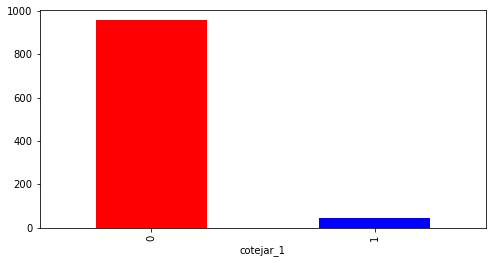

In [297]:
plt.figure(figsize = (8,4))
df_col.groupby("cotejar_1").Region.count().plot.bar(ylim=0, color= ["red", "blue"])
plt.show()

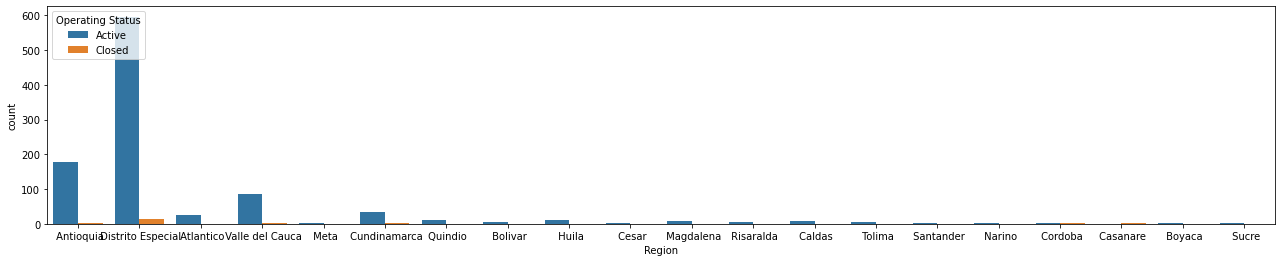

In [298]:
plt.figure(figsize = (22,4))
sns.countplot("Region",data=df_col, hue="Operating Status")


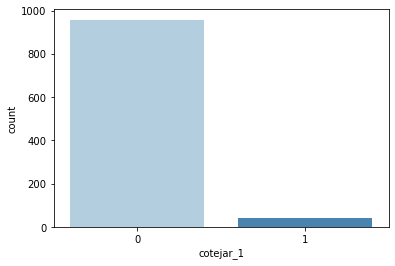

In [299]:
sns.countplot("cotejar_1", data=df_col,palette = "Blues" )

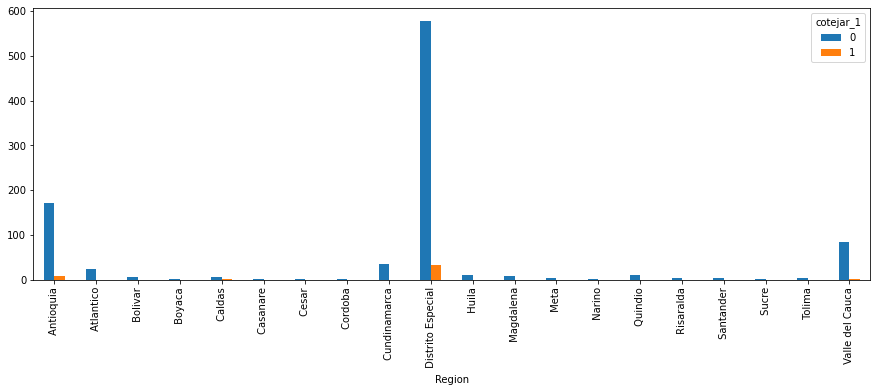

In [300]:

pd.crosstab(df_col.Region,df_col["cotejar_1"]).plot(kind='bar',figsize = (15,5))

In [301]:
df_col_sort_by_cb_rank = df_col.sort_values(["CB Rank (Company)"],ascending= False )
df_col_sort_by_estimated_revenue_range = df_col.sort_values(["Estimated Revenue Range"],ascending= False )
df_col_sort_by_Number_of_Employees = df_col.sort_values(["Number of Employees"],ascending= False )

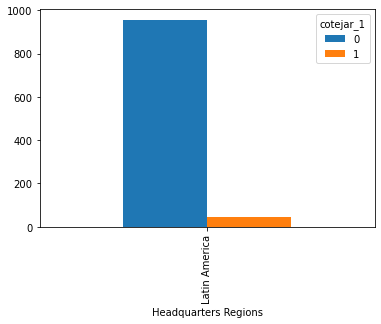

In [302]:
pd.crosstab(df_col["Headquarters Regions"],df_col.cotejar_1).plot(kind='bar')

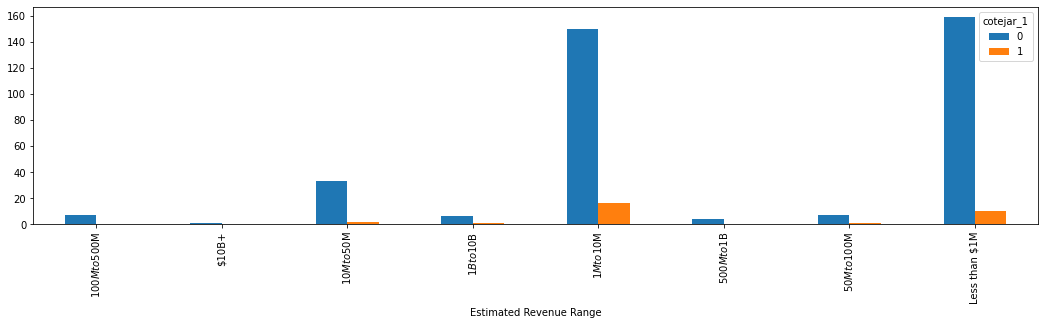

In [303]:
pd.crosstab(df_col["Estimated Revenue Range"],df_col.cotejar_1).plot(kind='bar', figsize = (18,4))

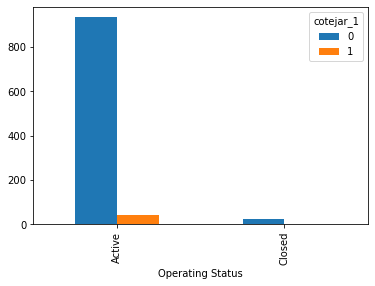

In [304]:
pd.crosstab(df_col["Operating Status"],df_col.cotejar_1).plot(kind='bar')

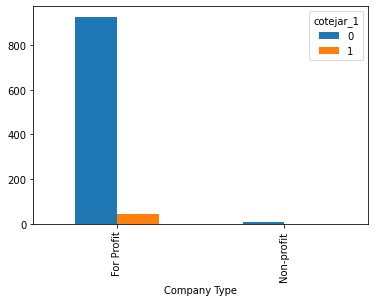

In [305]:
pd.crosstab(df_col["Company Type"],df_col.cotejar_1).plot(kind='bar')

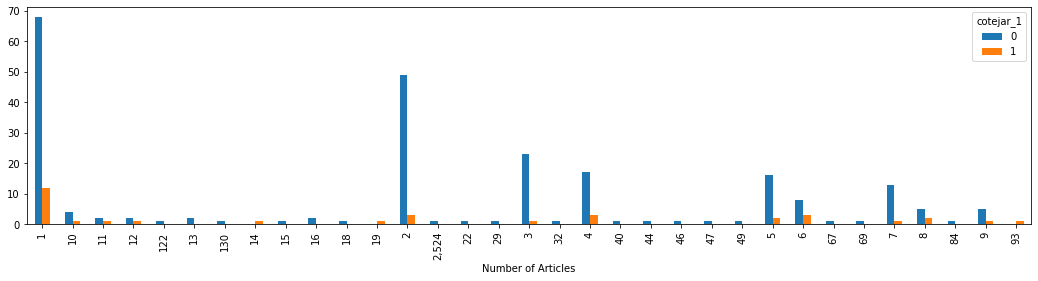

In [306]:
pd.crosstab(df_col["Number of Articles"],df_col.cotejar_1).plot(kind='bar', figsize = (18,4))

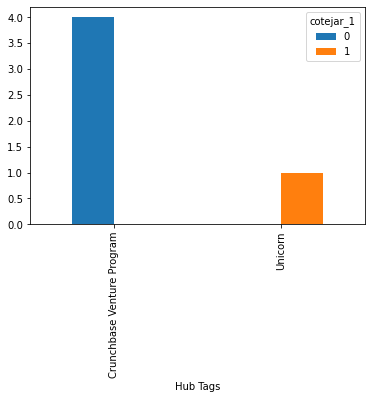

In [307]:
pd.crosstab(df_col["Hub Tags"],df_col.cotejar_1).plot(kind='bar')

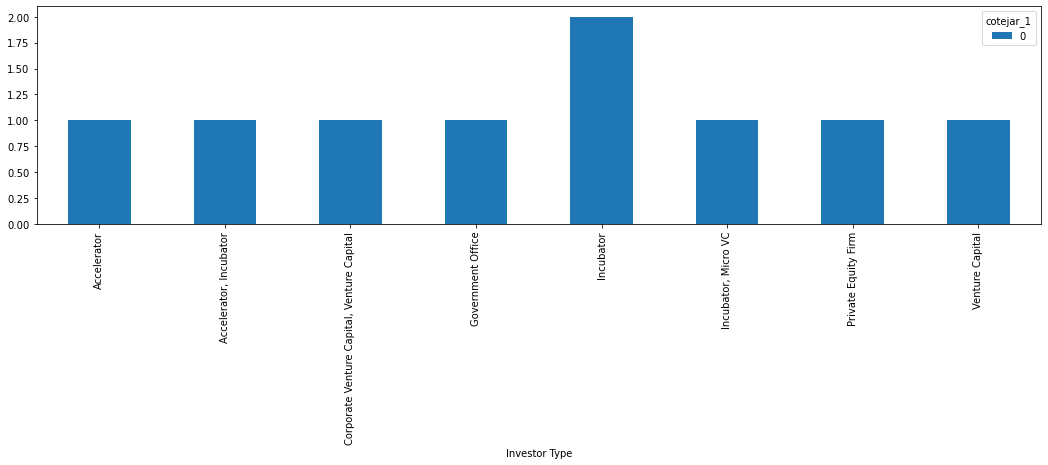

In [308]:
pd.crosstab(df_col["Investor Type"],df_col.cotejar_1).plot(kind='bar', figsize = (18,4))

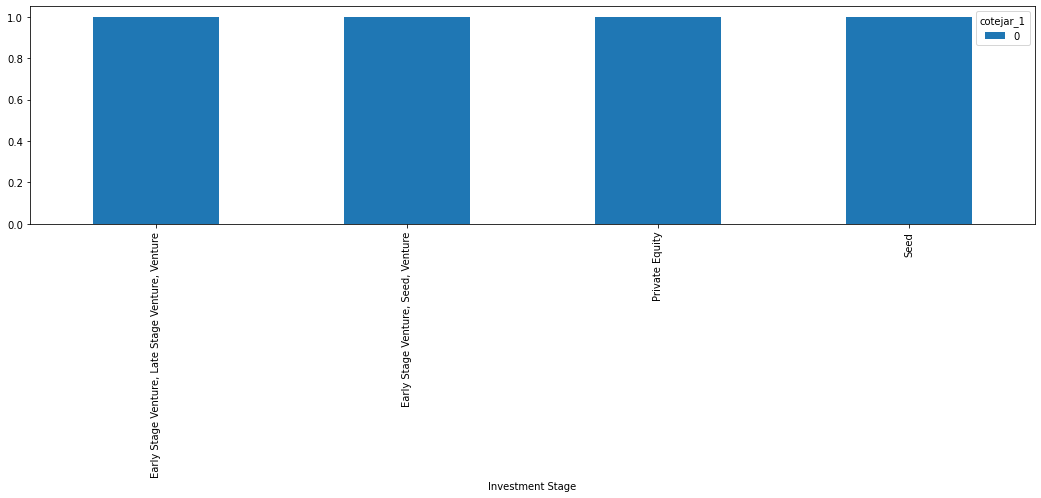

In [309]:
pd.crosstab(df_col["Investment Stage"],df_col.cotejar_1).plot(kind='bar', figsize = (18,4))

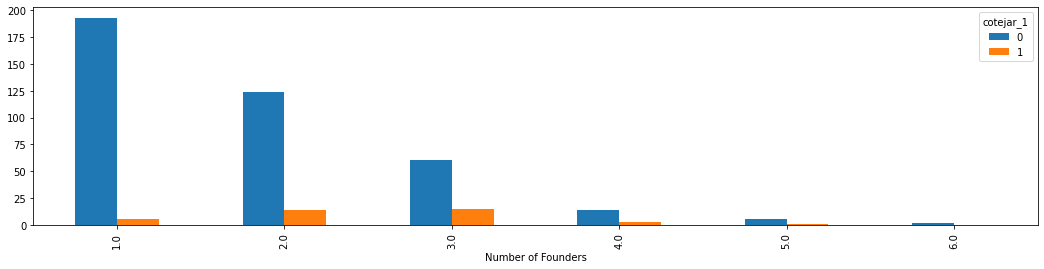

In [310]:
pd.crosstab(df_col["Number of Founders"],df_col.cotejar_1).plot(kind='bar', figsize = (18,4))

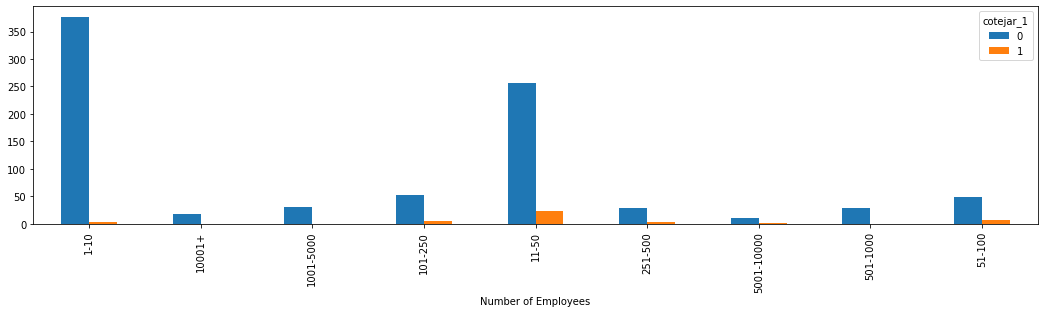

In [311]:
pd.crosstab(df_col["Number of Employees"],df_col.cotejar_1).plot(kind='bar', figsize = (18,4))

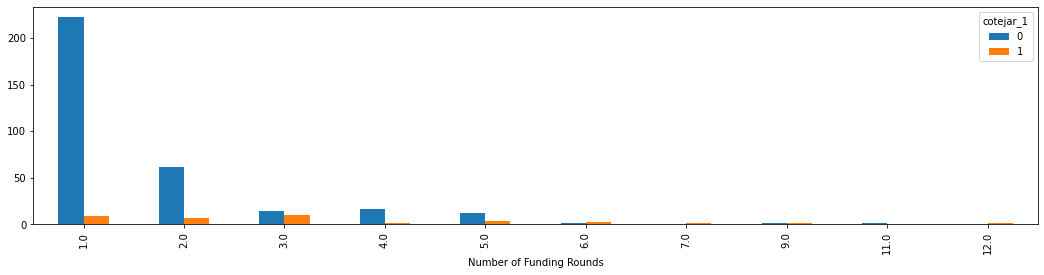

In [312]:
pd.crosstab(df_col["Number of Funding Rounds"],df_col.cotejar_1).plot(kind='bar', figsize = (18,4))

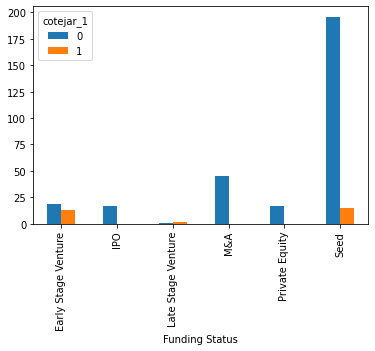

In [313]:
pd.crosstab(df_col["Funding Status"],df_col.cotejar_1).plot(kind='bar')

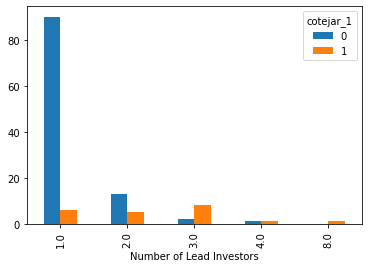

In [314]:
pd.crosstab(df_col["Number of Lead Investors"],df_col.cotejar_1).plot(kind='bar')

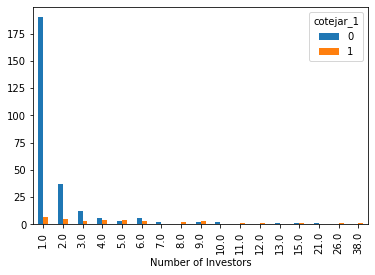

In [315]:
pd.crosstab(df_col["Number of Investors"],df_col.cotejar_1).plot(kind='bar')

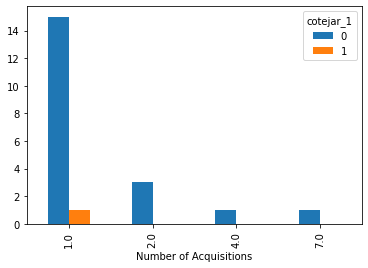

In [316]:
pd.crosstab(df_col["Number of Acquisitions"],df_col.cotejar_1).plot(kind='bar')

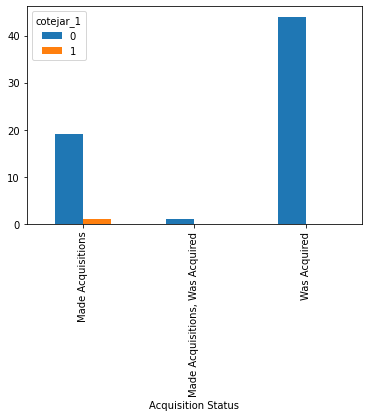

In [317]:
pd.crosstab(df_col["Acquisition Status"],df_col.cotejar_1).plot(kind='bar')

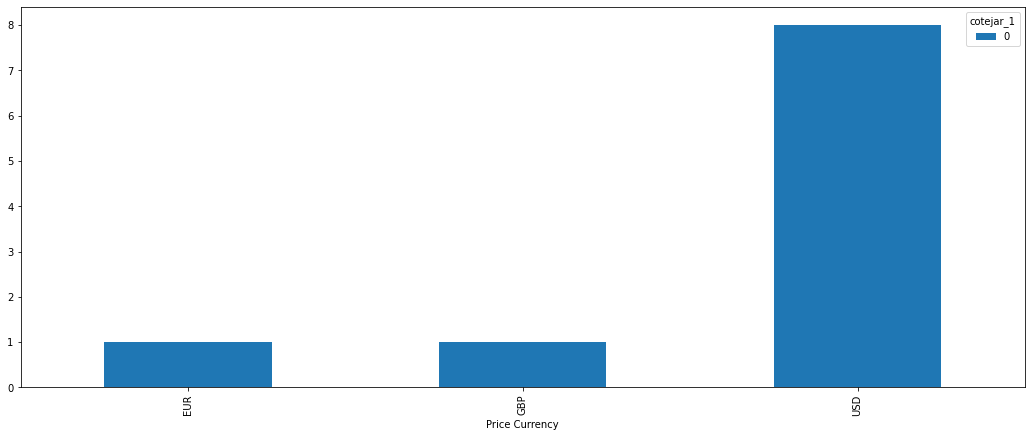

In [318]:
pd.crosstab(df_col["Price Currency"],df_col.cotejar_1).plot(kind='bar', figsize= (18,7))

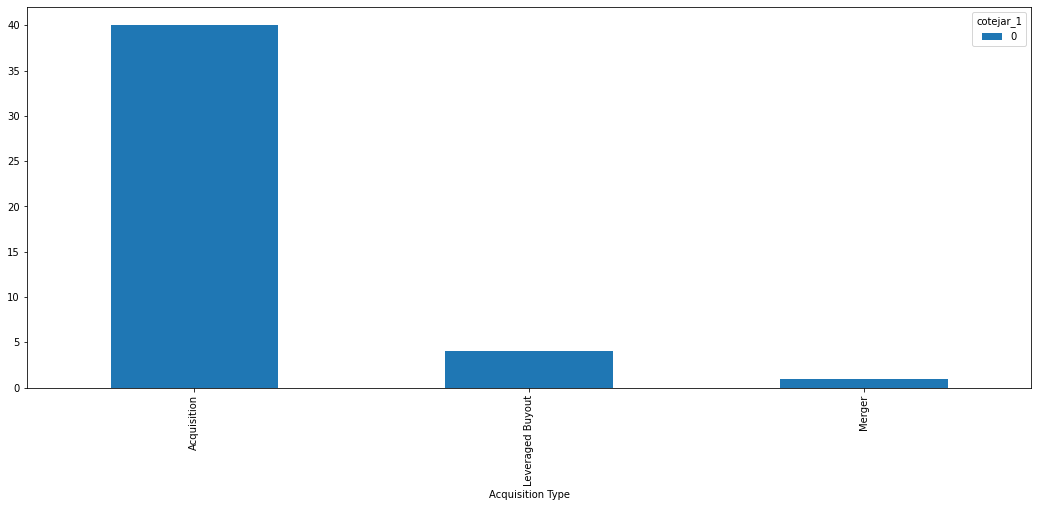

In [319]:
pd.crosstab(df_col["Acquisition Type"],df_col.cotejar_1).plot(kind='bar', figsize= (18,7))

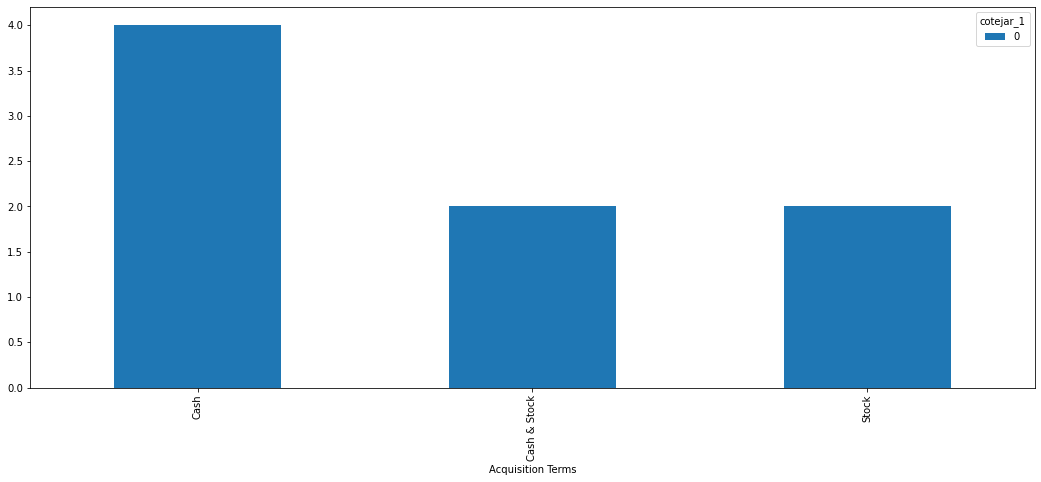

In [320]:
pd.crosstab(df_col["Acquisition Terms"],df_col.cotejar_1).plot(kind='bar', figsize= (18,7))

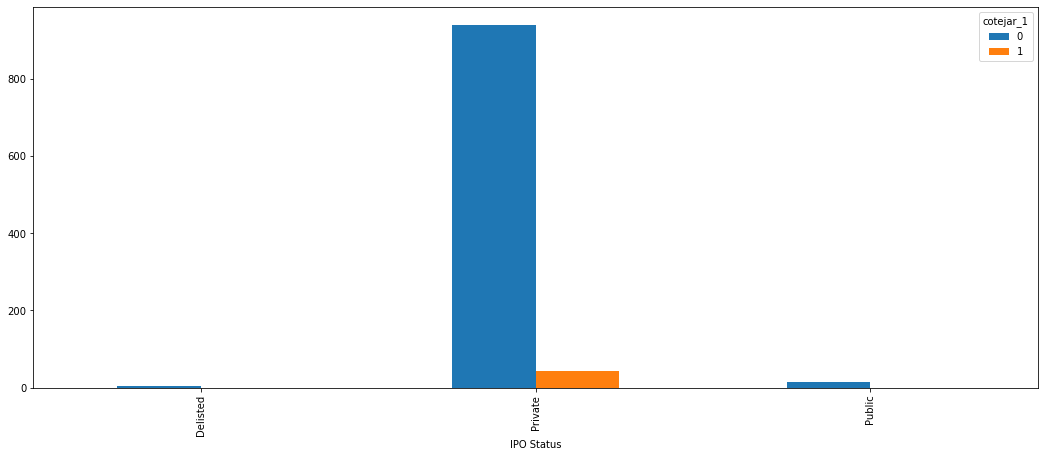

In [321]:
pd.crosstab(df_col["IPO Status"],df_col.cotejar_1).plot(kind='bar', figsize= (18,7))

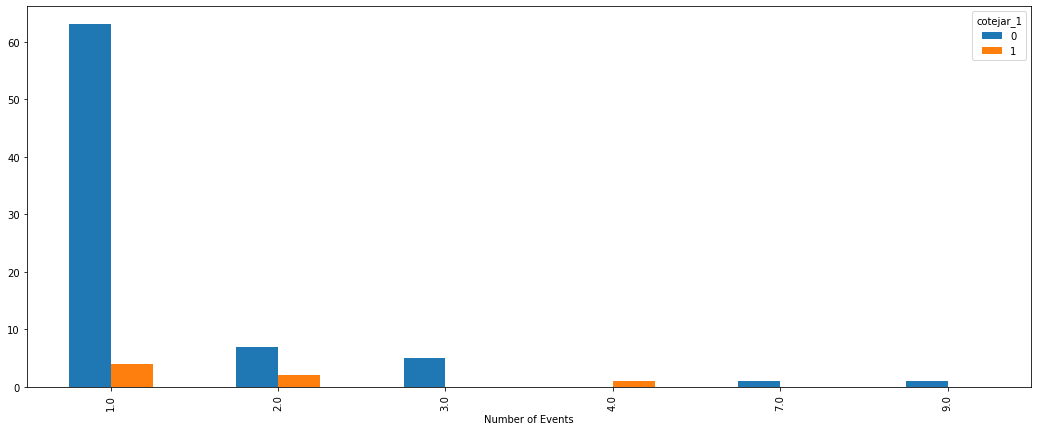

In [322]:
pd.crosstab(df_col["Number of Events"],df_col.cotejar_1).plot(kind='bar', figsize= (18,7))

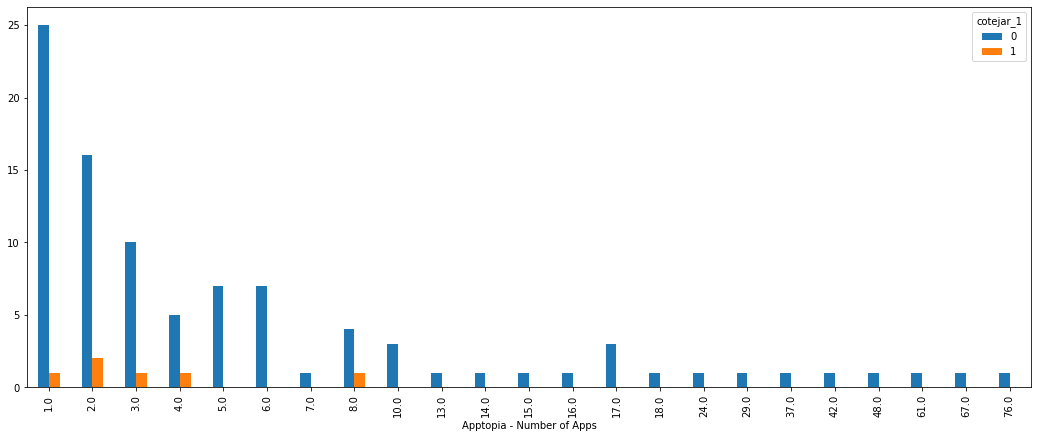

In [323]:
pd.crosstab(df_col["Apptopia - Number of Apps"],df_col.cotejar_1).plot(kind='bar', figsize= (18,7))

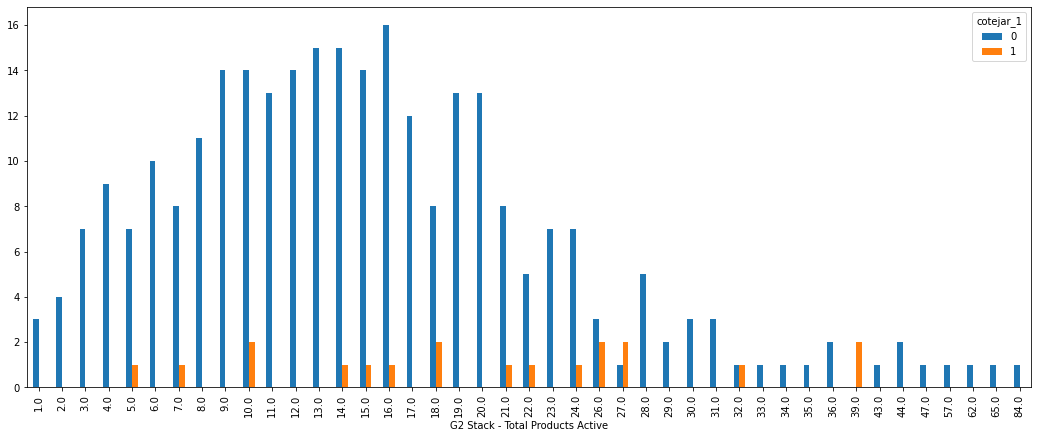

In [324]:
pd.crosstab(df_col["G2 Stack - Total Products Active"],df_col.cotejar_1).plot(kind='bar', figsize= (18,7))

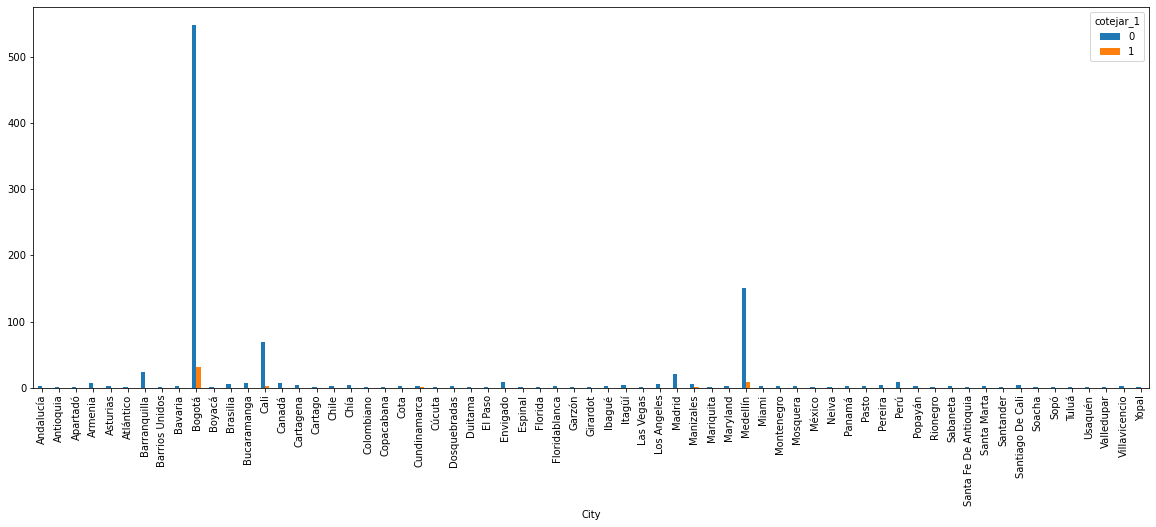

In [325]:
pd.crosstab(df_col["City"],df_col.cotejar_1).plot(kind='bar', figsize= (20,7))

In [326]:
COUNT_NO= len(df_col[df_col["cotejar_1"]==0])
COUNT_SI= len(df_col[df_col["cotejar_1"]==1])
PERCENT_NO = COUNT_NO/(COUNT_NO+COUNT_SI)              
print("Porcentaje de empresas que NO están en los 3 datas es %f"%(PERCENT_NO))              
PERCENT_SI =  COUNT_SI/(COUNT_NO+COUNT_SI)             
print("Porcentaje de empresas que SI están en los 3 datas es %f"%(PERCENT_SI))                      

Porcentaje de empresas que NO están en los 3 datas es 0.957000
Porcentaje de empresas que SI están en los 3 datas es 0.043000


In [327]:
only_city = df_col.pivot_table(index= 'Industries',values= ("cotejar_1") , aggfunc =np.sum)
only_city[only_city["cotejar_1"]>=1]


,cotejar_1
Industries,
"AgTech, B2B, E-Commerce, Logistics, Restaurants",1
"Agriculture, Farming, Financial Services, FinTech",1
"Analytics, Big Data, Health Care",1
"Analytics, Information Services, Information Technology, Internet",1
"Apps, Market Research, Mobile Apps",1
"Artificial Intelligence, Employment, Human Resources, SaaS, Software",1
"Artificial Intelligence, Enterprise Software, SaaS, Software, Speech Recognition, Virtual Assistant",1
"B2B, E-Commerce, Retail Technology",1
"Big Data, Credit, Financial Services, FinTech, Insurance, Payments",1
